In [351]:
import pandas as pd
import numpy as np
import os
import geopandas as gpd
from shapely.geometry import Point, Polygon
import matplotlib.pyplot as plt

In [352]:
df_rainfall_flood = pd.read_csv('../data/merged_flood_rainfall.csv')
df_geomorphology = pd.read_csv('../data/dominant_geomorphology_by_state.csv')
df_gdp = pd.read_csv('..\data\gdp_latest_per_state.csv') 
df_population = pd.read_csv('..\data\Population\population.csv')
df_drainage = pd.read_csv('..\data\drainage_density_per_state.csv')
df_geology = pd.read_csv('../data/predominant_permeability_by_state.csv')

In [353]:
name_map = {
    "Andaman & Nicobar Island": "AndamanandNicobar",
    "Andhra Pradesh": "AndhraPradesh",
    "Arunachal Pradesh": "ArunachalPradesh",
    "Assam": "Assam",
    "Bihar": "Bihar",
    "Chandigarh": "Chandigarh",
    "Chhattisgarh": "Chhattisgarh",
    "Delhi": "NCTofDelhi",
    "Goa": "Goa",
    "Gujarat": "Gujarat",
    "Haryana": "Haryana",
    "Himachal Pradesh": "HimachalPradesh",
    "Jammu & Kashmir": "JammuandKashmir",
    "Jharkhand": "Jharkhand",
    "Karnataka": "Karnataka",
    "Kerala": "Kerala",
    "Madhya Pradesh": "MadhyaPradesh",
    "Maharashtra": "Maharashtra",
    "Manipur": "Manipur",
    "Meghalaya": "Meghalaya",
    "Mizoram": "Mizoram",
    "Nagaland": "Nagaland",
    "Odisha": "Odisha",
    "Puducherry": "Puducherry",
    "Punjab": "Punjab",
    "Rajasthan": "Rajasthan",
    "Sikkim": "Sikkim",
    "Tamil Nadu": "TamilNadu",
    "Telangana": "Telangana",
    "Tripura": "Tripura",
    "Uttar Pradesh": "UttarPradesh",
    "Uttarakhand": "Uttarakhand",
    "West Bengal": "WestBengal",
    "Lakshadweep": "Lakshadweep"
}


df_population["state"] = df_population["state"].replace(name_map)
print(df_population["state"].nunique())



34


In [354]:
initial_geo = set(df_geomorphology['NAME_1'].unique())

In [355]:
df_population["state_clean"] = df_population["state"].str.upper().replace(" ", "").replace("&", "AND")
df_gdp["state_clean"] = df_gdp["state_match"].str.upper().replace(" ", "").replace("&", "AND")
df_rainfall_flood["state_clean"] = df_rainfall_flood["state_clean"].str.upper().str.replace(" ", "").replace("&", "AND")
df_geomorphology["state_clean"] = df_geomorphology["NAME_1"].str.upper().str.replace(" ", "").replace("&", "AND")
df_geology["state_clean"] = df_geology['NAME_1'].str.upper().str.replace(" ", "").replace("&", "AND")
df_drainage['state_clean'] = df_drainage['NAME_1'].str.upper().str.replace(" ", "").replace("&", "AND")

In [356]:
keep_states = df_rainfall_flood['state_clean'].unique()
df_population = df_population[df_population['state_clean'].isin(keep_states)]
df_gdp = df_gdp[df_gdp['state_clean'].isin(keep_states)]
df_geomorphology = df_geomorphology[df_geomorphology['state_clean'].isin(keep_states)]
df_geology = df_geology[df_geology['state_clean'].isin(keep_states)]
df_drainage = df_drainage[df_drainage['state_clean'].isin(keep_states)]

In [357]:
after_geo   = set(df_geomorphology['NAME_1'].unique()) 
removed_states = initial_geo - after_geo
print("Removed states:", removed_states)

Removed states: {'Goa', 'Haryana', 'NCTofDelhi', 'DamanandDiu', 'Lakshadweep', 'Chandigarh', 'JammuandKashmir', 'Manipur', 'AndamanandNicobar', 'DadraandNagarHaveli'}


# Missing States

Missing states/UTs: ['AndamanandNicobar', 'Chandigarh', 'DadraandNagarHaveli', 'DamanandDiu', 'Goa', 'Haryana', 'JammuandKashmir', 'Lakshadweep', 'Manipur', 'NCTofDelhi']


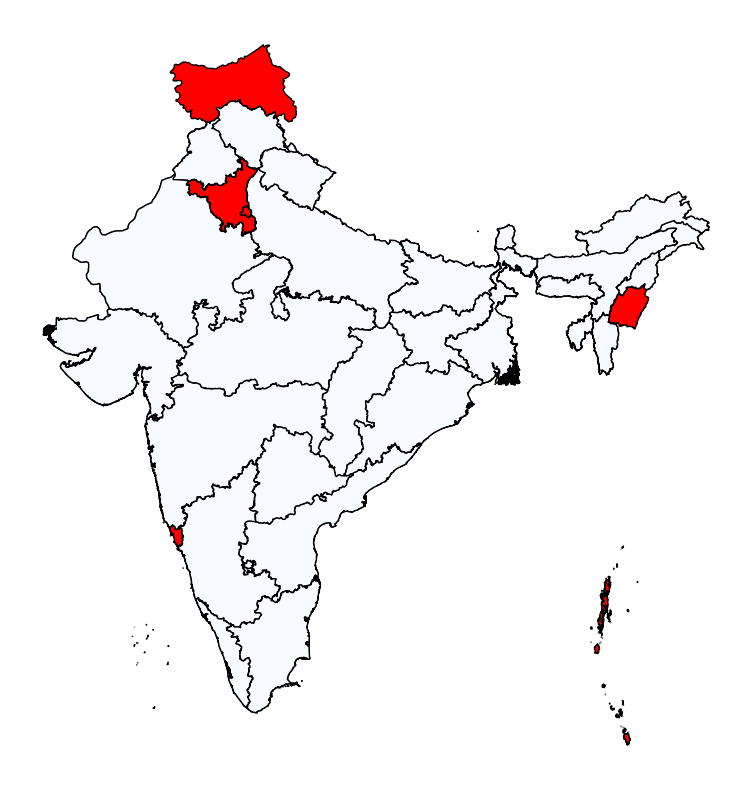

In [358]:
import re

include = [
    'UTTARAKHAND','ASSAM','TRIPURA','TELANGANA','HIMACHALPRADESH',
    'MEGHALAYA','MAHARASHTRA','PUNJAB','JHARKHAND','ANDHRAPRADESH',
    'ARUNACHALPRADESH','UTTARPRADESH','MADHYAPRADESH','KARNATAKA',
    'WESTBENGAL','RAJASTHAN','CHHATTISGARH','NAGALAND','BIHAR',
    'PUDUCHERRY','GUJARAT','ODISHA','TAMILNADU','KERALA','SIKKIM','MIZORAM'
]

def norm(s): 
    return re.sub(r"\W+", "", str(s)).upper()

states = gpd.read_file("..\data\Soil Profiles\india_states\gadm41_IND_1.json").to_crs("EPSG:4326")

states_plot = states.copy()
states_plot["key"] = states_plot["NAME_1"].map(norm)
include_set = set(norm(x) for x in include)
states_plot["included"] = states_plot["key"].isin(include_set)

missing = sorted(states_plot.loc[~states_plot["included"], "NAME_1"].unique())
print("Missing states/UTs:", missing)

ax = states_plot.plot(color="red", edgecolor="black", figsize=(10,10))
states_plot[states_plot["included"]].plot(ax=ax, color=None, column="included", cmap="Blues", edgecolor="black")
ax.set_axis_off()


In [359]:
# Sorting Rainfall & Flood
df_rainfall_flood_2 = df_rainfall_flood.drop(['State', 'state_code'], axis=1)
df_rainfall_flood_final = df_rainfall_flood_2.rename(columns=lambda x: f"rainfall_{x}")
df_rainfall_flood_final = df_rainfall_flood_final.rename(columns={'rainfall_state_clean': 'state_clean'})

print("Rainfall & Flood:")
print(df_rainfall_flood_final.head(), "\n")

# Sorting Population
# needs sorting state clean names
df_population_2 = df_population.drop('state', axis=1)
mask = (df_population_2['data'] == 'Total Population')
df_population_3 = df_population_2.loc[mask]
df_population_final = df_population_3[['state_clean', '2021']]
print("Population:")
print(df_population_final.head(), "\n")

# Sorting GDP
df_gdp_final = df_gdp.drop('state_match', axis=1)
print("GDP:")
print(df_gdp_final.head(), "\n")



Rainfall & Flood:
   rainfall_id rainfall_date  rainfall_actual  rainfall_rfs  rainfall_normal  \
0            0    2009-01-01              0.0      0.003906             2.19   
1            1    2009-01-01              0.0      0.000000             0.52   
2            2    2009-01-01              0.0      0.000000             0.09   
3            3    2009-01-01              0.0      0.000000             0.17   
4            4    2009-01-01              0.0      0.008566             3.31   

   rainfall_deviation      state_clean  rainfall_flood  
0              -100.0      UTTARAKHAND               0  
1              -100.0            ASSAM               0  
2              -100.0          TRIPURA               0  
3              -100.0        TELANGANA               0  
4              -100.0  HIMACHALPRADESH               0   

Population:
        state_clean      2021
1     ANDHRAPRADESH   91702.0
2  ARUNACHALPRADESH    1712.0
3             ASSAM   35999.0
4             BIHAR  1285

In [360]:
# Sorting Geomorphology
df_geomorphology_final = df_geomorphology.drop('NAME_1', axis=1)
df_geomorphology_final.rename(columns={'LEGEND_SHO': 'dominant_geomorphology', 'area_km2': 'geomorph_area_km2'})
print("Geomorphology:")
print(df_geomorphology_final.head(), "\n")

# Sorting Geology
df_geology_final = df_geology.drop('NAME_1', axis=1)
df_geology_final.rename(columns={'pct_of_state': 'perm_pct_of_state'})
print("Geology:")
print(df_geology_final.head(), "\n")

# Sorting Drainage
df_drainage_final = df_drainage.drop(['NAME_1', 'state_area_km2'], axis=1)
print("Drainage:")
print(df_drainage_final.head(), "\n")

Geomorphology:
                               LEGEND_SHO       area_km2       state_clean
1              Pediment Pediplain Complex  329768.219591     ANDHRAPRADESH
2  Moderately Dissected Hills and Valleys  116497.531866  ARUNACHALPRADESH
3  Moderately Dissected Hills and Valleys   64156.947592             ASSAM
4                          Alluvial Plain   76513.747429             BIHAR
6              Pediment Pediplain Complex  290719.648403      CHHATTISGARH 

Geology:
  predominant_perm  pct_of_state       state_clean
1         very_low     54.212521     ANDHRAPRADESH
2         moderate     89.784570  ARUNACHALPRADESH
3         moderate     62.389220             ASSAM
4         very_low     55.928730             BIHAR
6         moderate     61.882337      CHHATTISGARH 

Drainage:
   drainage_density_km_per_km2      state_clean
1                     0.019086          GUJARAT
3                     0.022641  HIMACHALPRADESH
4                     0.027683        JHARKHAND
5             

In [368]:
# print(df_rainfall_flood_final['state_clean'].value_counts())
print(df_drainage_final['state_clean'].value_counts())

state_clean
HIMACHALPRADESH     3
UTTARAKHAND         3
ARUNACHALPRADESH    2
GUJARAT             1
BIHAR               1
ASSAM               1
WESTBENGAL          1
UTTARPRADESH        1
TRIPURA             1
TELANGANA           1
TAMILNADU           1
SIKKIM              1
ANDHRAPRADESH       1
RAJASTHAN           1
PUNJAB              1
PUDUCHERRY          1
ODISHA              1
NAGALAND            1
MIZORAM             1
MEGHALAYA           1
MAHARASHTRA         1
MADHYAPRADESH       1
KERALA              1
KARNATAKA           1
JHARKHAND           1
CHHATTISGARH        1
Name: count, dtype: int64


In [362]:
df_rainfall_flood_final.head()

,rainfall_id,rainfall_date,rainfall_actual,rainfall_rfs,rainfall_normal,rainfall_deviation,state_clean,rainfall_flood
0,0,2009-01-01,0.0,0.003906,2.19,-100.0,UTTARAKHAND,0
1,1,2009-01-01,0.0,0.000000,0.52,-100.0,ASSAM,0
2,2,2009-01-01,0.0,0.000000,0.09,-100.0,TRIPURA,0
3,3,2009-01-01,0.0,0.000000,0.17,-100.0,TELANGANA,0
4,4,2009-01-01,0.0,0.008566,3.31,-100.0,HIMACHALPRADESH,0
